In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import unidecode
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Clasificación binaria de noticias Fake o True

In [62]:
#! conda install --yes nltk==3.4.5
#! conda install --yes unidecode

In [9]:
df_fake =pd.read_csv("./Fakenews/Fake.csv")
df_true =pd.read_csv("./Fakenews/True.csv")

#df_fake =pd.read_csv("Fake.csv")
#df_true =pd.read_csv("True.csv")

In [10]:
print(df_fake.shape)
df_fake.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [65]:
print(df_true.shape)
df_true.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [66]:
#Agregamos una columna de clase 1 para las fake
df_fake["class"] = 1
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [67]:
#Agregamos una columnas de clase 0 para las noticias True
df_true["class"] = 0
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [68]:
#Concatenamos ambos datasets
df = pd.concat([df_fake, df_true], ignore_index = True)
print(df.shape)
df.head()


(44898, 5)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

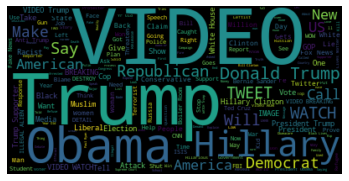

In [70]:
# Mostramos con Wordcloud una nube de palabras de Fake

text = " ".join(i for i in df_fake.title)
wordcloud = WordCloud(max_words=200).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

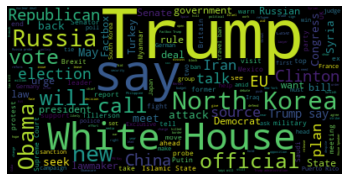

In [71]:
# Mostramos con Wordcloud una nube de palabras de True

text2 = " ".join(i for i in df_true.title)

wordcloud = WordCloud(max_words=200).generate(text2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
df.tail()

,title,text,subject,date,class
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [73]:
# Hay algunas lineas cuyos valores son exactamente identicas
df.duplicated().sum()

209

In [74]:
# Valores duplicados en titulo
df.title.duplicated(keep=False).sum()

11798

In [75]:
#Mostramos algunos de los que tienen duplicado en el título
df.loc[df.title.duplicated()]

,title,text,subject,date,class
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017",1
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",1
10920,MEDIA IGNORES Time That Bill Clinton FIRED His...,At the recommendation of both Attorney General...,politics,"May 10, 2017",1
10924,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",politics,"May 10, 2017",1
10930,FORMER FBI ASST DIRECTOR: “Jim Comey ‘Danced W...,He threw the reputation of the FBI under the ...,politics,"May 9, 2017",1
...,...,...,...,...,...
44883,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",0
44884,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",0
44886,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",0
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0


In [77]:
#Los titulos son exactamente iguales, a pesar de que la noticia es diferente
df.loc[[10920,10924],:]

,title,text,subject,date,class
10920,MEDIA IGNORES Time That Bill Clinton FIRED His...,At the recommendation of both Attorney General...,politics,"May 10, 2017",1
10924,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",politics,"May 10, 2017",1


In [78]:
# El número de duplicados por título y clase coincide con el de duplicados solo por clase 
# (es decir, todos los títulos duplicados pertenecen a la misma clase)

df[["title","class"]].duplicated(keep=False).sum()

11798

In [79]:
# Eliminamos las noticias con título duplicado, nos quedamos con los primeros
df.drop_duplicates(subset=["title"], keep='first', inplace=True)
df.reset_index()
df.shape

(38729, 5)

In [80]:
df["class"].value_counts(1)

0    0.537737
1    0.462263
Name: class, dtype: float64

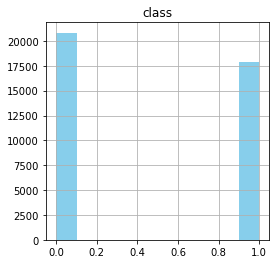

In [81]:
df.hist(figsize=(4,4), color='skyblue');

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38729 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38729 non-null  object
 1   text     38729 non-null  object
 2   subject  38729 non-null  object
 3   date     38729 non-null  object
 4   class    38729 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [83]:
df["subject"].value_counts(1)

politicsNews       0.287898
worldnews          0.249839
News               0.233649
politics           0.176457
US_News            0.020217
left-news          0.018203
Government News    0.013736
Name: subject, dtype: float64

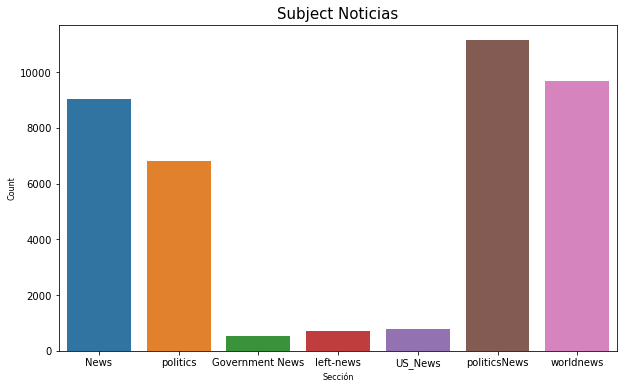

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(df['subject']);

plt.title('Subject noticias'.title() , fontsize=15);
plt.ylabel('count'.title(), fontsize=8);
plt.xlabel('sección'.title(), fontsize=8);

In [85]:
#Extraemos el año de date

pattern_year = r"(\d{4})"

df["year"] = df.date.str.extract(pattern_year)
df["year"].value_counts()

2017    22951
2016    14093
2015     1646
Name: year, dtype: int64

In [86]:
df.isnull().sum() #dropeamos esos 39 registros que quedaron con year nulo

title       0
text        0
subject     0
date        0
class       0
year       39
dtype: int64

In [87]:
df.dropna(subset=['year'], inplace=True)
df.isnull().sum()*100/len(df)

title      0.0
text       0.0
subject    0.0
date       0.0
class      0.0
year       0.0
dtype: float64

In [88]:
df.head()

,title,text,subject,date,class,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,2017
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,2017
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,2017
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,2017
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,2017


In [89]:
#Unificamos en un único campo la concatenación de los títulos y las noticias, para que sea nuestra "x"
df['news']=df['title']+ ' '+df['text'];
df['news'][14000]

'WHAT THESE YOUNG ILLEGAL ‘DREAMERS’ Do To Trump Supporters Will Make Your Blood Boil [Video] What kind of monsters teach their children to behave like this? Young illegal  dreamers  and their parents flip off Trump supporters while yelling expletives you would expect to hear in a prison, and not from young boys who look to be between the ages of 8 and 12. Wearing sombreros and ironically holding signs reading  No hate,  screamed  F*ck you!  These vulgar children give us a little insight into the flagrant disrespect the illegal alien community has for the rule of law in our nation. The Mexican flags add a special touch, reminding us of where these protesters true loyalties lie.One of the most vulgar children in the center of the action could be seen wearing a Bernie Sanders sticker.Hillary Clinton campaign signs could also be seen in the crowd.One sign reads  F*ck You Puto. Puto  means  male prostitute  in Spanish.Obama s America  '

In [90]:
df.head(3)

,title,text,subject,date,class,year,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,2017,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,2017,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,2017,Sheriff David Clarke Becomes An Internet Joke...


---------------------

In [91]:
df["subject"].value_counts(1)

politicsNews       0.288188
worldnews          0.250090
News               0.233885
politics           0.175653
US_News            0.020238
left-news          0.018196
Government News    0.013750
Name: subject, dtype: float64

In [92]:
#Analizamos como es la variedad de noticias según sección, considerando los True y False 
#Esto puede generar un problema de prediccion porque le va a poner 0 a todas las de la clase poiticsNews y worldnews
df.groupby(["subject", "class"])["news"].count()

subject          class
Government News  1          532
News             1         9049
US_News          1          783
left-news        1          704
politics         1         6796
politicsNews     0        11150
worldnews        0         9676
Name: news, dtype: int64

In [93]:
# Clases a unificar:
# Vemos que las clases "politics" y "politicsNews" tienen diferente nombre porque provienen de data sets diferentes 
# Como la clase "left-news" y "Goverment news" son minoritarias (< 2% cada una) las incluímos dentro de la clase "politics"

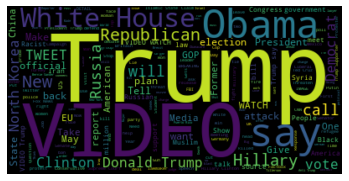

In [94]:
text_news = " ".join(i for i in df.title if (df.subject == "News").any())

wordcloud_news = WordCloud(max_words=200).generate(text_news)

plt.imshow(wordcloud_news, interpolation='bilinear')
plt.axis("off")
plt.show()

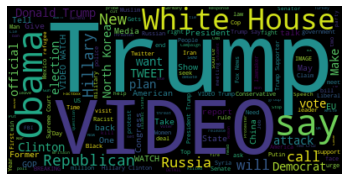

In [95]:
text_us_news = " ".join(i for i in df.title if (df.subject == "US_News").any())

wordcloud_us_news = WordCloud(max_words=200).generate(text_us_news)

plt.imshow(wordcloud_us_news, interpolation='bilinear')
plt.axis("off")
plt.show()
#mirando las palabras que más se repiten, podemos unir "News" y "US_News")

In [96]:
df.head()

,title,text,subject,date,class,year,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,2017,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,2017,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,2017,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,2017,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,2017,Pope Francis Just Called Out Donald Trump Dur...


In [97]:
#unificamos categorías similares

subject_replace = {
    "politicsNews" : "politics",
    "US_News" : "News",
    "Government News" : "politics",
    "left-news" : "politics"
     }

df["new_subject"] = df["subject"]

for key in subject_replace:
    df["new_subject"] = df.new_subject.str.replace(key, subject_replace[key])
    
df.new_subject.value_counts(1)

politics     0.495787
News         0.254123
worldnews    0.250090
Name: new_subject, dtype: float64

In [98]:
df.drop(['subject'], axis=1, inplace=True)
df.head()#dropeamos subject porque son las categorías viejas que confundirían al modelo

,title,text,date,class,year,news,new_subject
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",1,2017,Donald Trump Sends Out Embarrassing New Year’...,News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",1,2017,Drunk Bragging Trump Staffer Started Russian ...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",1,2017,Sheriff David Clarke Becomes An Internet Joke...,News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",1,2017,Trump Is So Obsessed He Even Has Obama’s Name...,News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",1,2017,Pope Francis Just Called Out Donald Trump Dur...,News


In [99]:
df.dtypes

title          object
text           object
date           object
class           int64
year           object
news           object
new_subject    object
dtype: object

In [100]:
#Extraemos el mes de date y rellenamos en una columna nueva 'month' cada uno

#(intenté pasar esta data que es object a datetime y despues extraer el mes con dt.month 
#pero por alguna razon me da error, si encuentrar una manera más autoática y directa de hacer esto, mejor)

december = r"(December)"
df["diciembre"] = df["date"].str.contains(december)

jan = r"(January)"
df["enero"] = df["date"].str.contains(jan)

feb = r"(February)"
df["febrero"] = df["date"].str.contains(feb)

mar = r"(March)"
df["marzo"] = df["date"].str.contains(mar)

apr = r"(April)"
df["abril"] = df["date"].str.contains(apr)

may = r"(May)"
df["mayo"] = df["date"].str.contains(may)

jun = r"(June)"
df["junio"] = df["date"].str.contains(jun)

jul = r"(July)"
df["julio"] = df["date"].str.contains(jul)

aug = r"(August)"
df["agosto"] = df["date"].str.contains(aug)

sep = r"(September)"
df["septiembre"] = df["date"].str.contains(sep)

octo = r"(October)"
df["octubre"] = df["date"].str.contains(octo)

nov = r"(November)"
df["noviembre"] = df["date"].str.contains(nov)


df.head()
#ahora pasamos a numericas las booleanas de meses

C:\Users\krist_21mtz37\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,title,text,date,class,year,news,new_subject,diciembre,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",1,2017,Donald Trump Sends Out Embarrassing New Year’...,News,True,False,False,False,False,False,False,False,False,False,False,False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",1,2017,Drunk Bragging Trump Staffer Started Russian ...,News,True,False,False,False,False,False,False,False,False,False,False,False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",1,2017,Sheriff David Clarke Becomes An Internet Joke...,News,True,False,False,False,False,False,False,False,False,False,False,False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",1,2017,Trump Is So Obsessed He Even Has Obama’s Name...,News,True,False,False,False,False,False,False,False,False,False,False,False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",1,2017,Pope Francis Just Called Out Donald Trump Dur...,News,True,False,False,False,False,False,False,False,False,False,False,False


In [101]:
df.enero = df.enero.replace({True: 1, False: 0})
df.febrero = df.febrero.replace({True: 1, False: 0})
df.marzo = df.marzo.replace({True: 1, False: 0})
df.abril = df.abril.replace({True: 1, False: 0})
df.mayo = df.mayo.replace({True: 1, False: 0})
df.junio = df.junio.replace({True: 1, False: 0})
df.julio = df.julio.replace({True: 1, False: 0})
df.agosto = df.agosto.replace({True: 1, False: 0})
df.septiembre = df.septiembre.replace({True: 1, False: 0})
df.octubre = df.octubre.replace({True: 1, False: 0})
df.noviembre = df.noviembre.replace({True: 1, False: 0})
df.diciembre = df.diciembre.replace({True: 1, False: 0})

In [102]:
(df['news'] == 0).all() #chequeamos que no queden valores con 0 en todos los meses

False

In [103]:
df.columns

Index(['title', 'text', 'date', 'class', 'year', 'news', 'new_subject',
       'diciembre', 'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
       'julio', 'agosto', 'septiembre', 'octubre', 'noviembre'],
      dtype='object')

In [106]:
df.dtypes

title          object
text           object
date           object
class           int64
year           object
news           object
new_subject    object
diciembre       int64
enero           int64
febrero         int64
marzo           int64
abril           int64
mayo            int64
junio           int64
julio           int64
agosto          int64
septiembre      int64
octubre         int64
noviembre       int64
dtype: object

In [104]:
#Antes de hacer el split seguro tenemos que vectorizar, encodear y tokenizar

In [105]:
X = df["news"]
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29017,)
(9673,)
(29017,)
(9673,)
